In [96]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [97]:
# Create graph where nodes are countries and edges are interconnectors
# Each edge represent the total flow between two countries

G = nx.DiGraph()

# From Belgium
G.add_edge("BE", "DE")
G.add_edge("BE", "FR")
G.add_edge("BE", "LU")
G.add_edge("BE", "NL")
G.add_edge("BE", "UK")
# To Belgium
G.add_edge("DE", "BE")
G.add_edge("FR", "BE")
G.add_edge("LU", "BE")
G.add_edge("NL", "BE")
G.add_edge("UK", "BE")
# From Denmark
G.add_edge("DK", "DE")
G.add_edge("DK", "NL")
G.add_edge("DK", "NO")
G.add_edge("DK", "SE")
G.add_edge("DK", "UK")
# To Denmark
G.add_edge("DE", "DK")
G.add_edge("NL", "DK")
G.add_edge("NO", "DK")
G.add_edge("SE", "DK")
G.add_edge("UK", "DK")
# From Germany
G.add_edge("DE", "AT")
G.add_edge("DE", "BE")
G.add_edge("DE", "CH")
G.add_edge("DE", "CZ")
G.add_edge("DE", "DK")
G.add_edge("DE", "FR")
G.add_edge("DE", "LU")
G.add_edge("DE", "NL")
G.add_edge("DE", "NO")
G.add_edge("DE", "PL")
G.add_edge("DE", "SE")
# To Germany
G.add_edge("AT", "DE")
G.add_edge("BE", "DE")
G.add_edge("CH", "DE")
G.add_edge("CZ", "DE")
G.add_edge("DK", "DE")
G.add_edge("FR", "DE")
G.add_edge("LU", "DE")
G.add_edge("NL", "DE")
G.add_edge("NO", "DE")
G.add_edge("PL", "DE")
G.add_edge("SE", "DE")
# From France
G.add_edge("FR", "BE")
G.add_edge("FR", "CH")
G.add_edge("FR", "DE")
G.add_edge("FR", "ES")
G.add_edge("FR", "IT")
G.add_edge("FR", "UK")
# To France
G.add_edge("BE", "FR")
G.add_edge("CH", "FR")
G.add_edge("DE", "FR")
G.add_edge("ES", "FR")
G.add_edge("IT", "FR")
G.add_edge("UK", "FR")
# From Netherlands
G.add_edge("NL", "BE")
G.add_edge("NL", "DE")
G.add_edge("NL", "DK")
G.add_edge("NL", "NO")
G.add_edge("NL", "UK")
# To Netherlands
G.add_edge("BE", "NL")
G.add_edge("DE", "NL")
G.add_edge("DK", "NL")
G.add_edge("NO", "NL")
G.add_edge("UK", "NL")
# From Norway
G.add_edge("NO", "DE")
G.add_edge("NO", "DK")
G.add_edge("NO", "FI")
G.add_edge("NO", "NL")
G.add_edge("NO", "SE")
G.add_edge("NO", "UK")
# To Norway
G.add_edge("DE", "NO")
G.add_edge("DK", "NO")
G.add_edge("FI", "NO")
G.add_edge("NL", "NO")
G.add_edge("SE", "NO")
G.add_edge("UK", "NO")
# From United Kingdom
G.add_edge("UK", "BE")
G.add_edge("UK", "DK")
G.add_edge("UK", "FR")
G.add_edge("UK", "IE")
G.add_edge("UK", "NL")
G.add_edge("UK", "NO")
# To United Kingdom
G.add_edge("BE", "UK")
G.add_edge("DK", "UK")
G.add_edge("FR", "UK")
G.add_edge("IE", "UK")
G.add_edge("NL", "UK")
G.add_edge("NO", "UK")

print(G.nodes())
# Print all edges both ways
print(G.edges())

['BE', 'DE', 'FR', 'LU', 'NL', 'UK', 'DK', 'NO', 'SE', 'AT', 'CH', 'CZ', 'PL', 'ES', 'IT', 'FI', 'IE']
[('BE', 'DE'), ('BE', 'FR'), ('BE', 'LU'), ('BE', 'NL'), ('BE', 'UK'), ('DE', 'BE'), ('DE', 'DK'), ('DE', 'AT'), ('DE', 'CH'), ('DE', 'CZ'), ('DE', 'FR'), ('DE', 'LU'), ('DE', 'NL'), ('DE', 'NO'), ('DE', 'PL'), ('DE', 'SE'), ('FR', 'BE'), ('FR', 'DE'), ('FR', 'CH'), ('FR', 'ES'), ('FR', 'IT'), ('FR', 'UK'), ('LU', 'BE'), ('LU', 'DE'), ('NL', 'BE'), ('NL', 'DK'), ('NL', 'DE'), ('NL', 'NO'), ('NL', 'UK'), ('UK', 'BE'), ('UK', 'DK'), ('UK', 'FR'), ('UK', 'NL'), ('UK', 'NO'), ('UK', 'IE'), ('DK', 'DE'), ('DK', 'NL'), ('DK', 'NO'), ('DK', 'SE'), ('DK', 'UK'), ('NO', 'DK'), ('NO', 'DE'), ('NO', 'NL'), ('NO', 'FI'), ('NO', 'SE'), ('NO', 'UK'), ('SE', 'DK'), ('SE', 'DE'), ('SE', 'NO'), ('AT', 'DE'), ('CH', 'DE'), ('CH', 'FR'), ('CZ', 'DE'), ('PL', 'DE'), ('ES', 'FR'), ('IT', 'FR'), ('FI', 'NO'), ('IE', 'UK')]


In [98]:
dfs = {}
for edge in G.edges():
    country1 = edge[0]
    country2 = edge[1]
    filename = (
        "data/flow/" + country1 + "_" + country2 + "_202304010000-202311010000.csv"
    )
    dfs[f"{country1}->{country2}"] = pd.read_csv(filename, index_col=0)

In [103]:
# Combine all dataframes into one, where individual dataframes have column 'quantity'
df = pd.concat(dfs, axis=1)
# Remove the multiindex column names
df.columns = df.columns.droplevel(1)
df

,BE->DE,BE->FR,BE->LU,BE->NL,BE->UK,DE->BE,DE->DK,DE->AT,DE->CH,DE->CZ,...,SE->NO,AT->DE,CH->DE,CH->FR,CZ->DE,PL->DE,ES->FR,IT->FR,FI->NO,IE->UK
2023-04-01 00:00:00+00:00,23,0,106,1441.0,596.0,0,0,1450,915,725.0,...,2295.0,144,0,0.0,403.0,0.0,1069,0.0,0.0,0.0
2023-04-01 00:15:00+00:00,26,0,139,NaN,NaN,0,0,1435,896,NaN,...,NaN,167,0,NaN,NaN,NaN,1171,NaN,NaN,NaN
2023-04-01 00:30:00+00:00,32,0,97,NaN,NaN,0,0,1346,897,NaN,...,NaN,223,0,NaN,NaN,NaN,1174,NaN,NaN,NaN
2023-04-01 00:45:00+00:00,0,0,102,NaN,NaN,43,0,1368,814,NaN,...,NaN,242,30,NaN,NaN,NaN,1080,NaN,NaN,NaN
2023-04-01 01:00:00+00:00,0,0,152,1888.0,179.0,865,0,1337,676,822.0,...,2459.0,312,174,0.0,344.0,0.0,924,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31 22:45:00+00:00,148,0,69,NaN,NaN,0,0,426,81,NaN,...,NaN,1591,673,NaN,NaN,NaN,1409,NaN,NaN,NaN
2023-10-31 23:00:00+00:00,273,0,127,2607.0,1020.0,0,0,225,150,0.0,...,1891.0,1101,1050,0.0,2045.0,1112.0,1493,0.0,0.0,NaN
2023-10-31 23:15:00+00:00,285,0,139,NaN,NaN,0,0,252,210,NaN,...,NaN,976,1058,NaN,NaN,NaN,1545,NaN,NaN,NaN
2023-10-31 23:30:00+00:00,285,0,115,NaN,NaN,0,0,223,214,NaN,...,NaN,922,1223,NaN,NaN,NaN,1323,NaN,NaN,NaN


In [104]:
# Drop rows that have NaN values
df = df.dropna()
df

,BE->DE,BE->FR,BE->LU,BE->NL,BE->UK,DE->BE,DE->DK,DE->AT,DE->CH,DE->CZ,...,SE->NO,AT->DE,CH->DE,CH->FR,CZ->DE,PL->DE,ES->FR,IT->FR,FI->NO,IE->UK


In [100]:
df.to_csv("data/flow/combined.csv")

In [101]:
for edge, df in dfs.items():
    G[edge[0]][edge[1]]["flow"] = 123

KeyError: 'B'

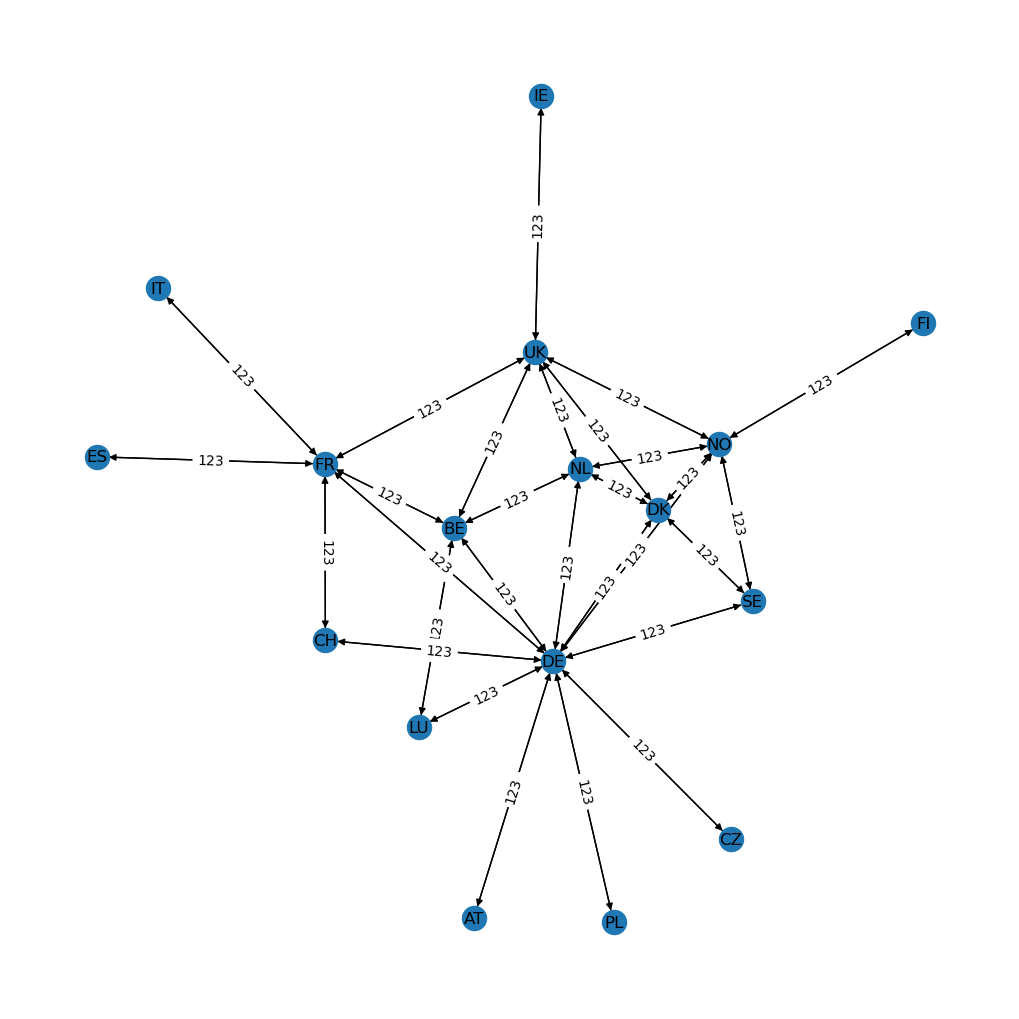

In [ ]:
# Draw graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, "flow")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()